We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-06-03 10:44:03--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.78, 13.227.223.117, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-30,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [4]:
df.count()

dateRep                    20920
day                        20920
month                      20920
year                       20920
cases                      20920
deaths                     20920
countriesAndTerritories    20920
geoId                      20920
countryterritoryCode       20692
popData2018                20619
continentExp               20920
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-29   0.0  563.0  580.0  0.0  0.0  26.0  442.0  2.0  769.0  28.0  ...   
2020-05-30   1.0  638.0  623.0  0.0  0.0  23.0  460.0  4.0  717.0  51.0  ...   
2020-05-31   0.0  726.0  866.0  0.0  0.0  23.0  251.0  7.0  795.0  44.0  ...   
2020-06-01   0.0  661.0  680.0  0.0  0.0  15.0  355.0  2.0  637.0   4.0  ...   
2020-06-02   1.0  635.0  545.0  0.0  0.0   6.0  210.0  0.0  564.0  21.0  ...   

           deaths                                                 
geoId          VC   VE   VG   VI   VN   XK    YE    ZA   ZM   ZW  
dateRep                                                           
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN   NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...   ...   ...  ...  ...  
2020-05-29    0.0  0.0  0.0  0.0  0.0  0.0   4.0  25.0  0.0  0.0  
2020-05-30    0.0  3.0  0.0  0.0  0.0  0.0   9.0  34.0  0.0  0.0  
2020-05-31    0.0  0.0  0.0  0.0  0.0  0.0  11.0  32.0  0.0  0.0  
2020-06-01    0.0  0.0  0.0  0.0  0.0  0.0   3.0  40.0  0.0  0.0  
2020-06-02    0.0  3.0  0.0  0.0  0.0  0.0   4.0  22.0  0.0  0.0  

[155 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-05-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-31   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-01   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-06-02   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-05-29 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-30 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-31 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-01 NaN  NaN NaN NaN NaN NaN NaN  
2021-06-02 NaN  NaN NaN NaN NaN NaN NaN  

[520 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    520.000000
mean     259.500000
std      150.255338
min        0.000000
25%      129.750000
50%      259.500000
75%      389.250000
max      519.000000
Name: daynum, dtype: float64

Suppress warnings for multiple plots when analyzing many countries with `showplots = True`.

In [8]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running for multiple countries with a selection or simply all countries found in the input. Full documentation of the approach is found in the `Gumbelpivot` notebook.

US: R2 0.957 at  79.10% of  2289855 start 2020-03-06 peak 2020-04-26 floor 2020-09-17 beta 25.56 mu 117
UK: R2 0.987 at  86.38% of   319902 start 2020-03-12 peak 2020-04-23 floor 2020-08-17 beta 21.29 mu 114
BR: R2 0.868 at   5.19% of  9994434 start 2020-03-24 peak 2020-08-20 floor NaT beta 69.01 mu 233
CH: R2 0.998 at 100.01% of    30786 start 2020-03-09 peak 2020-03-30 floor 2020-05-31 beta 10.52 mu  90
DE: R2 0.992 at 102.21% of   178095 start 2020-03-10 peak 2020-04-03 floor 2020-06-09 beta 12.89 mu  94
IT: R2 0.990 at  96.06% of   242753 start 2020-02-28 peak 2020-04-01 floor 2020-07-04 beta 17.09 mu  92
ES: R2 0.991 at 101.95% of   235054 start 2020-03-07 peak 2020-04-01 floor 2020-06-13 beta 12.09 mu  92
PT: R2 0.880 at  87.65% of    37305 start 2020-03-03 peak 2020-04-13 floor 2020-07-31 beta 21.26 mu 104
FR: R2 0.970 at  99.31% of   153154 start 2020-03-09 peak 2020-04-06 floor 2020-06-18 beta 14.49 mu  97
SE: R2 0.973 at  69.44% of    54454 start 2020-02-29 peak 2020-05-04 fl

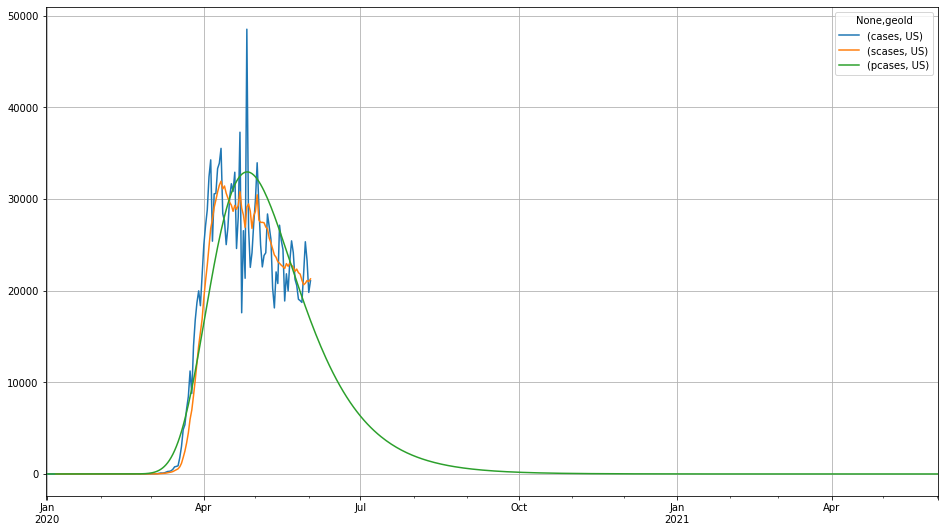

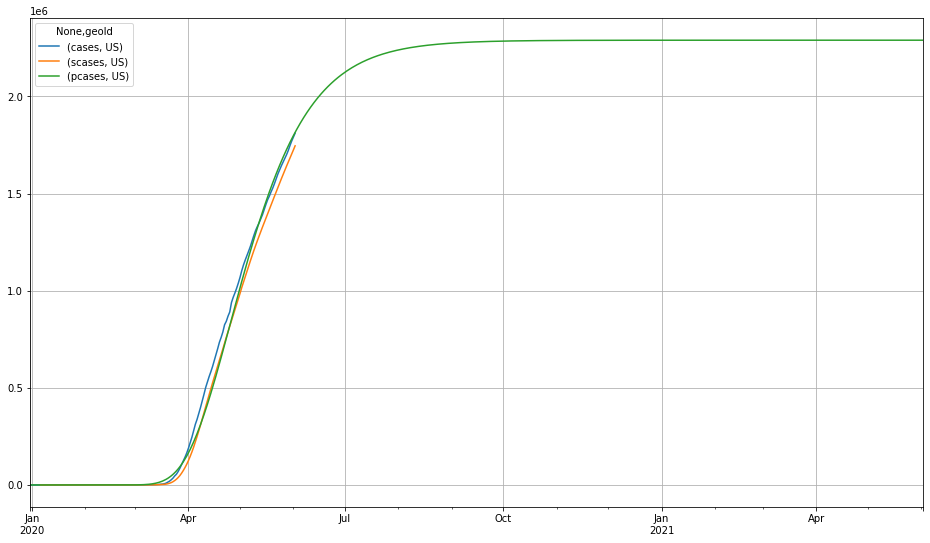

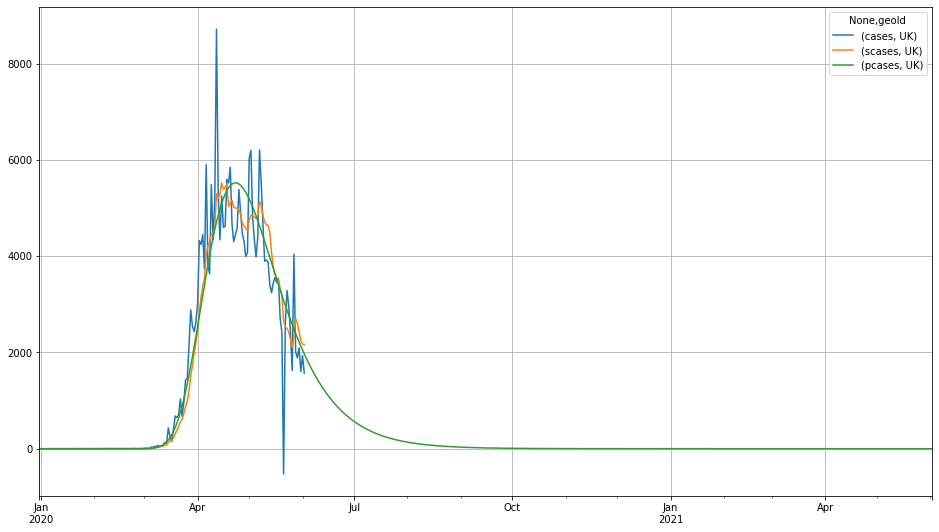

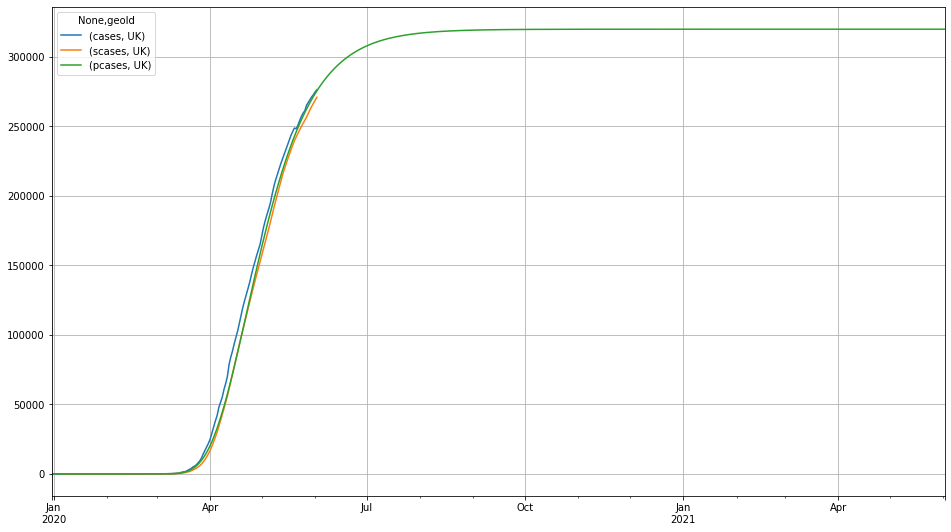

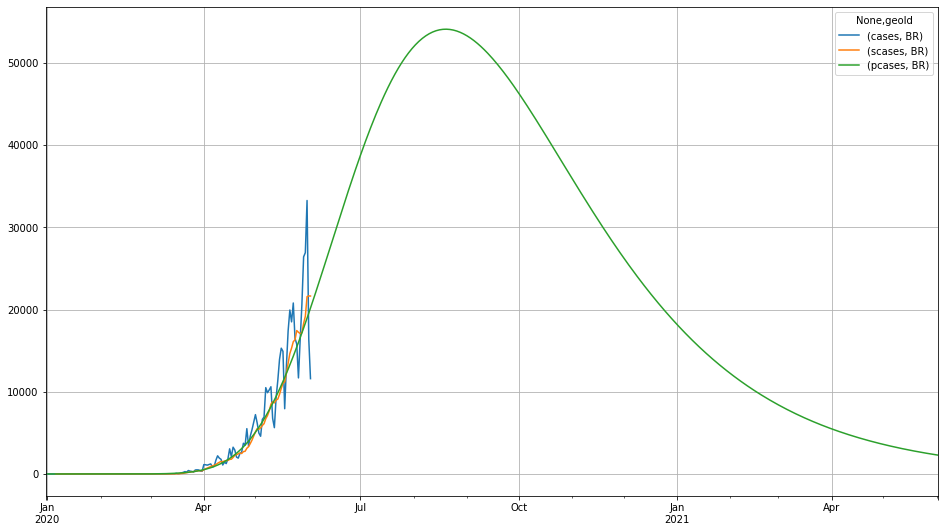

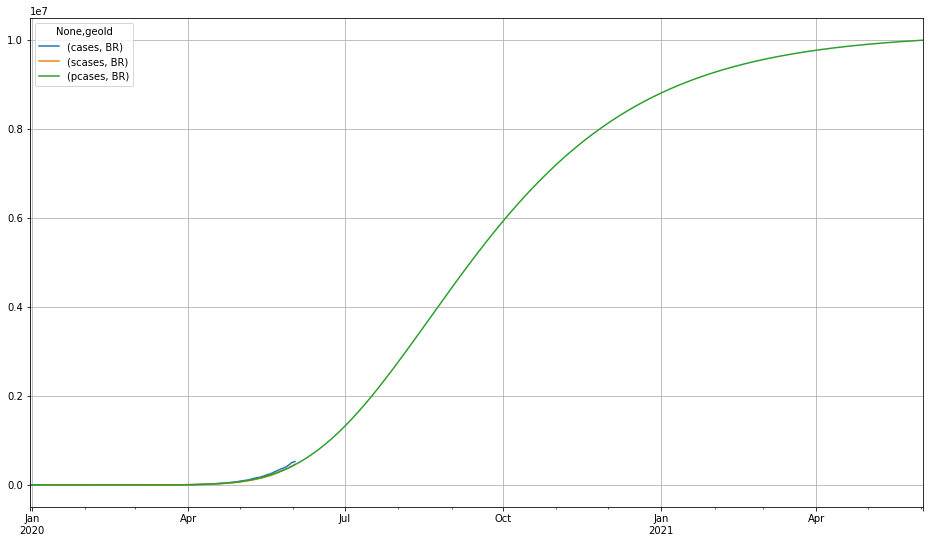

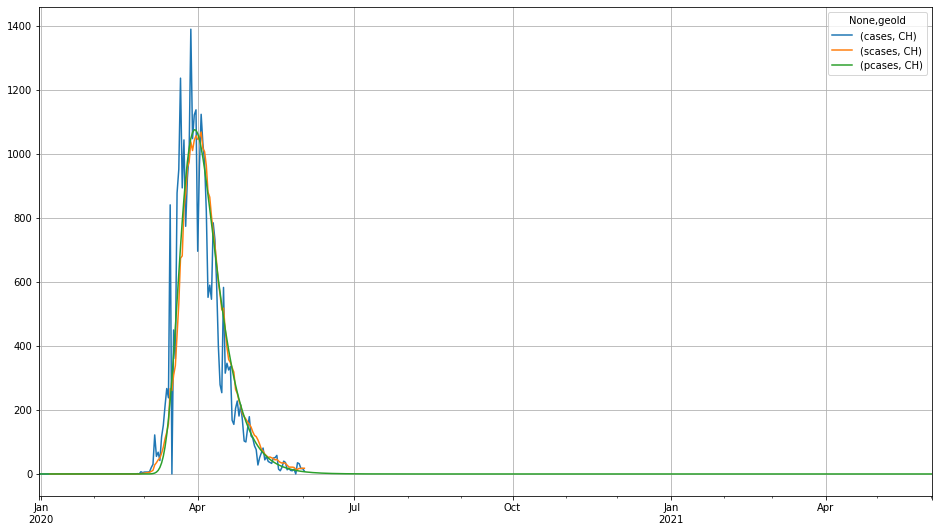

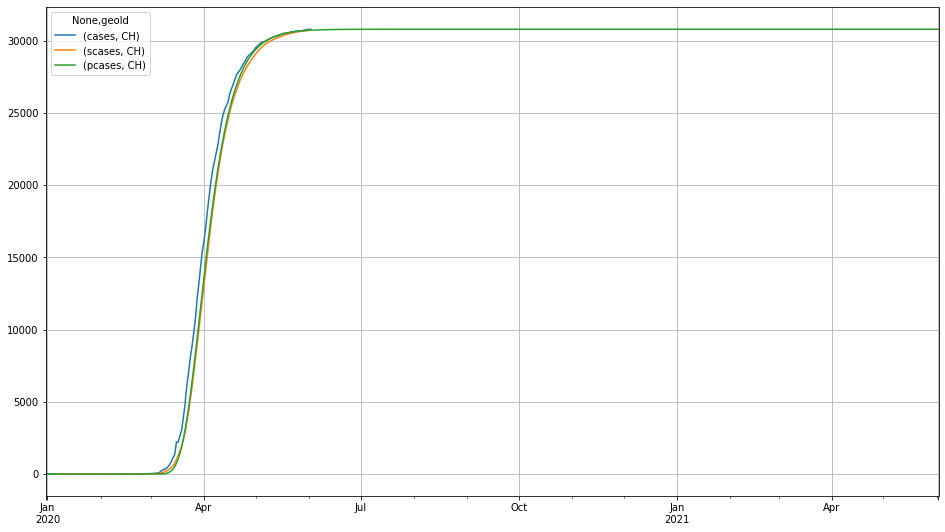

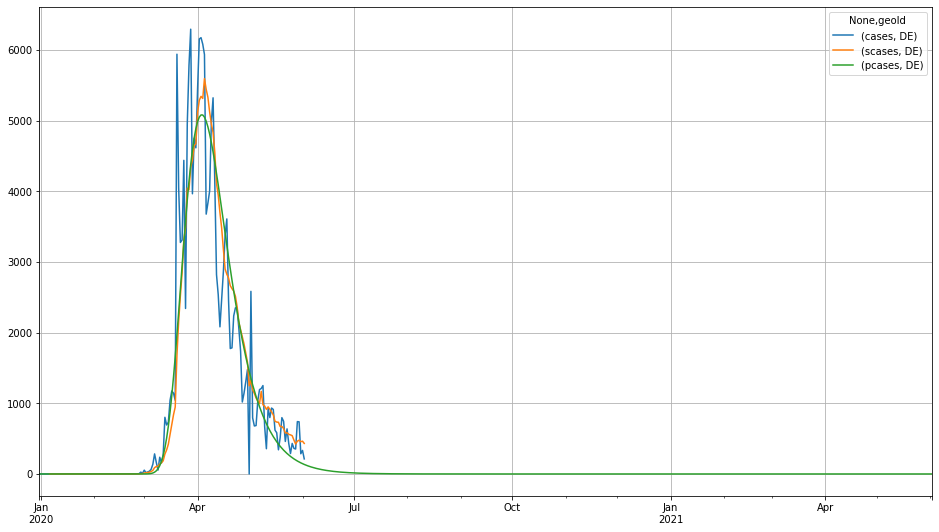

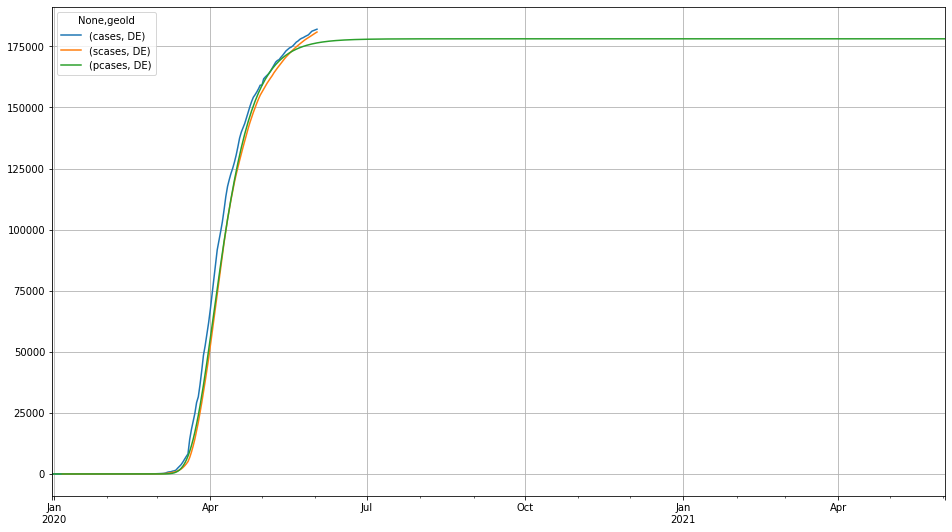

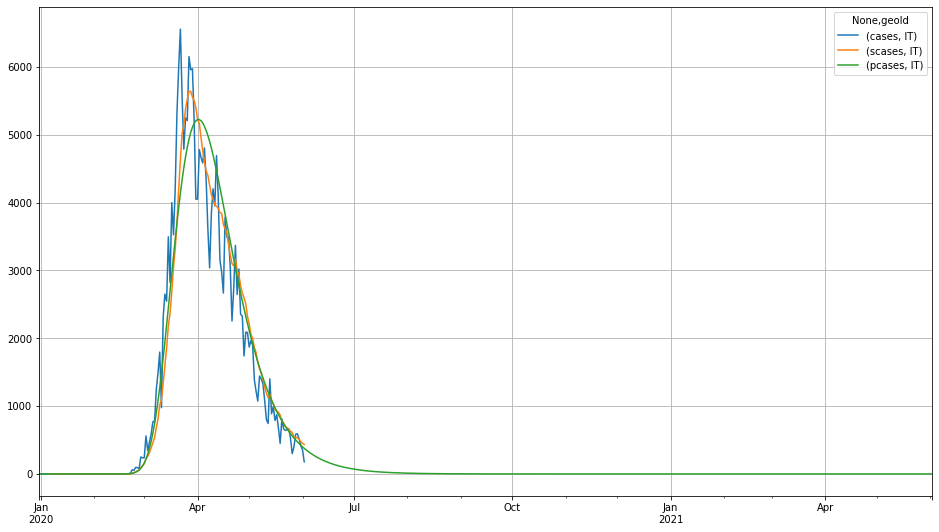

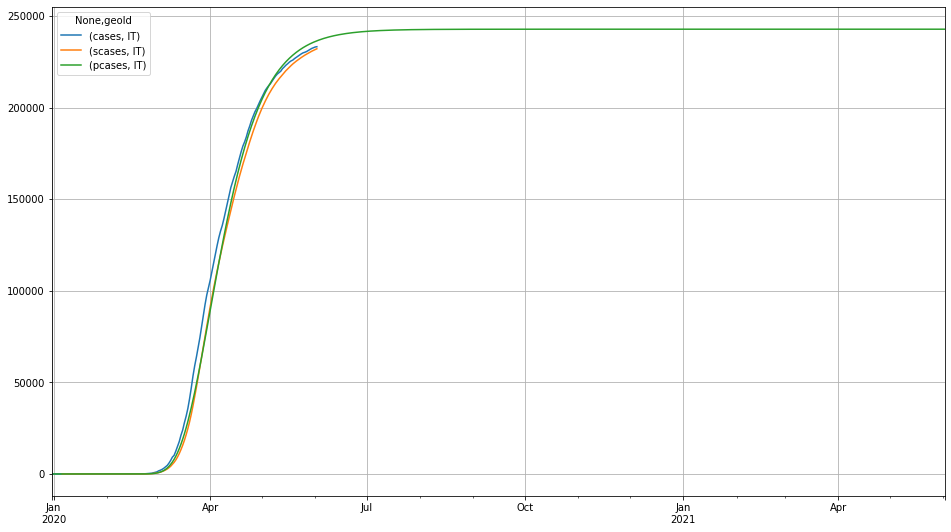

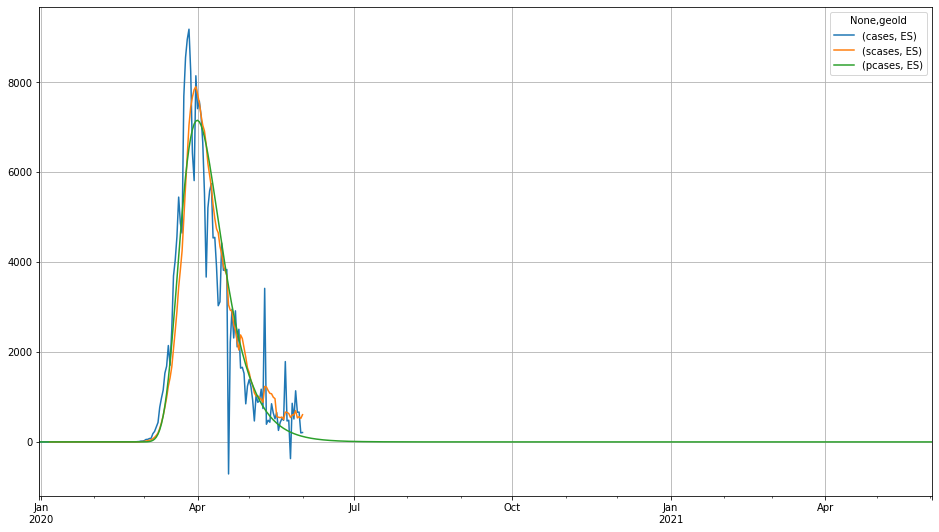

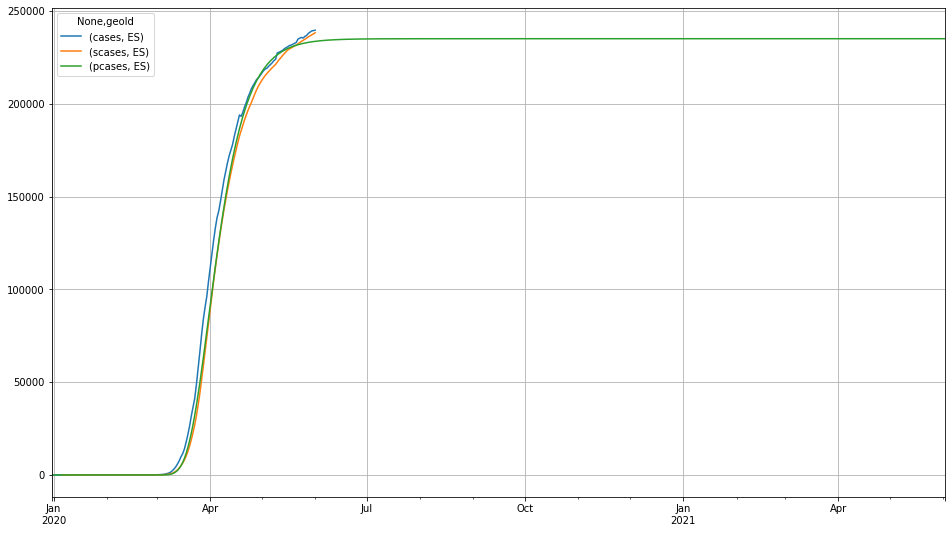

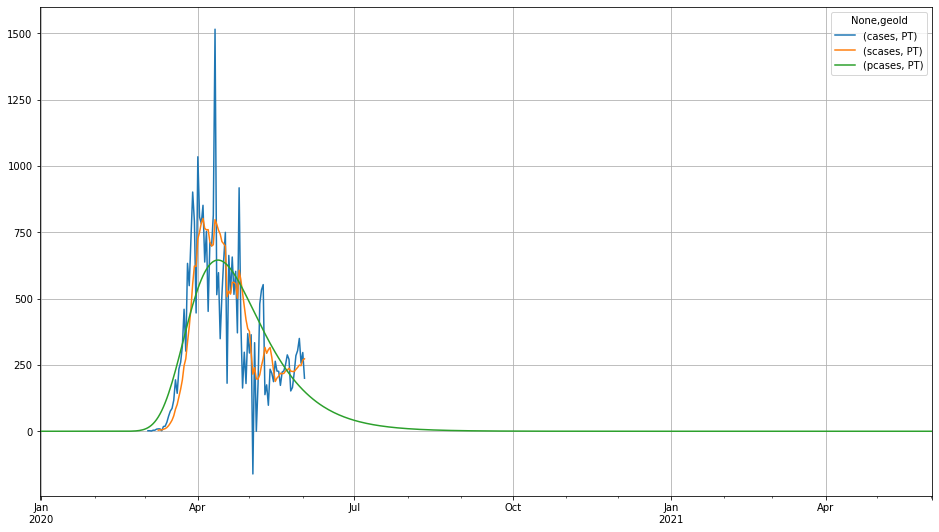

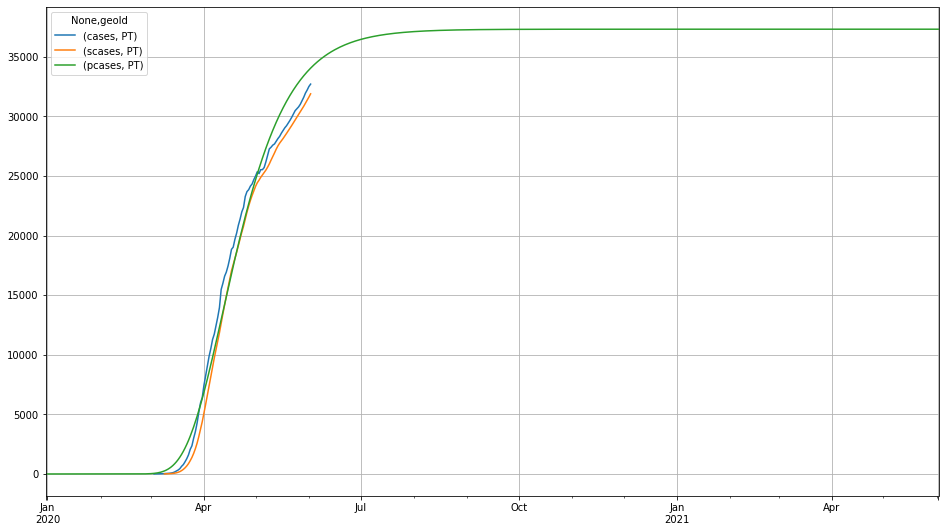

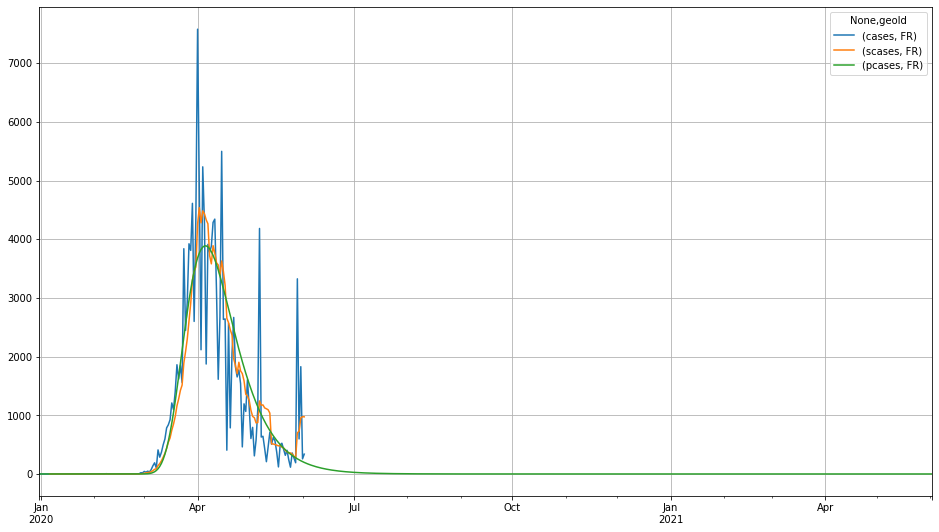

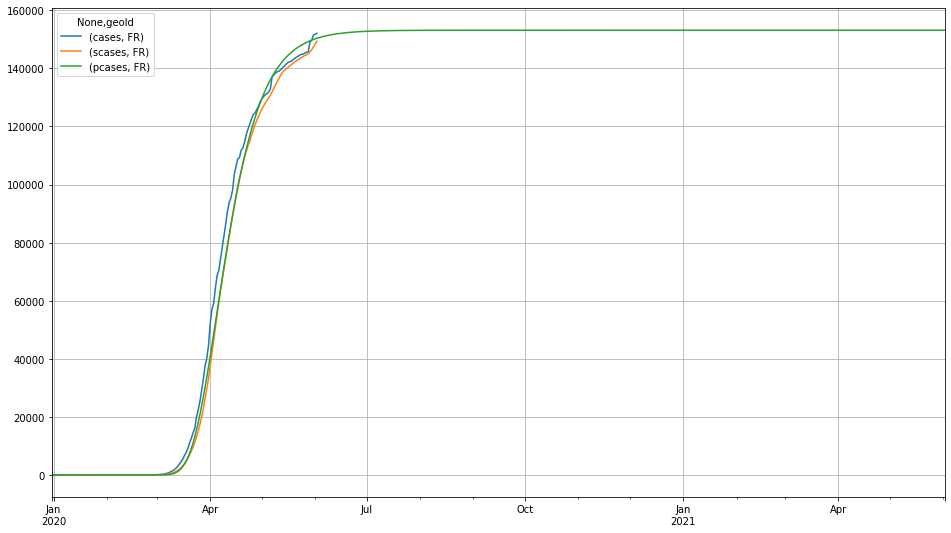

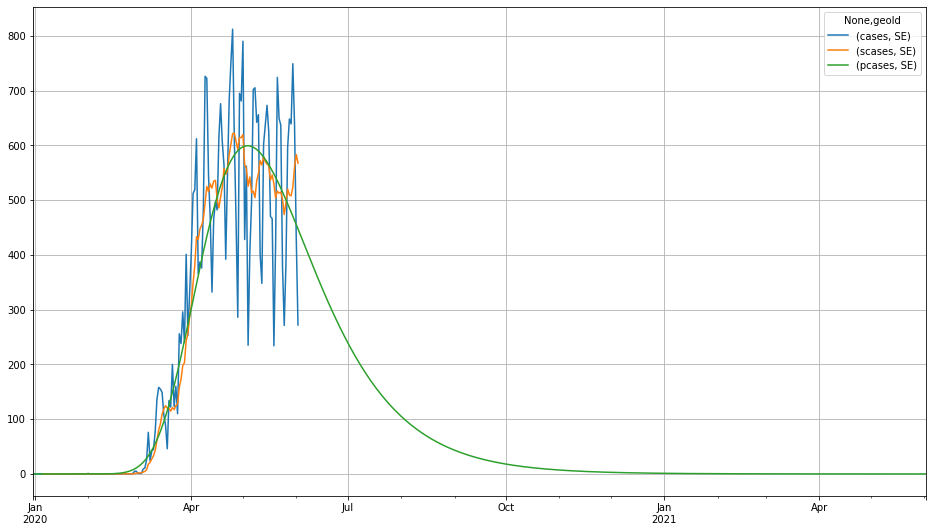

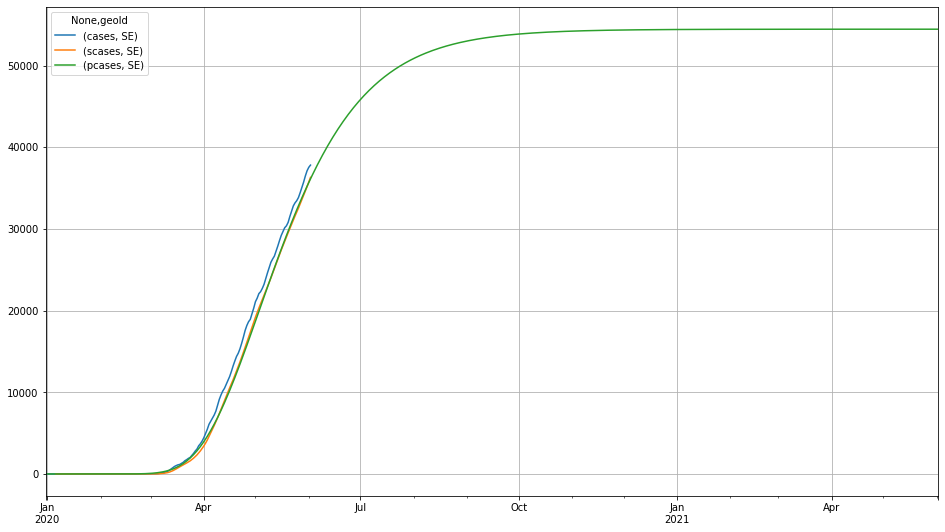

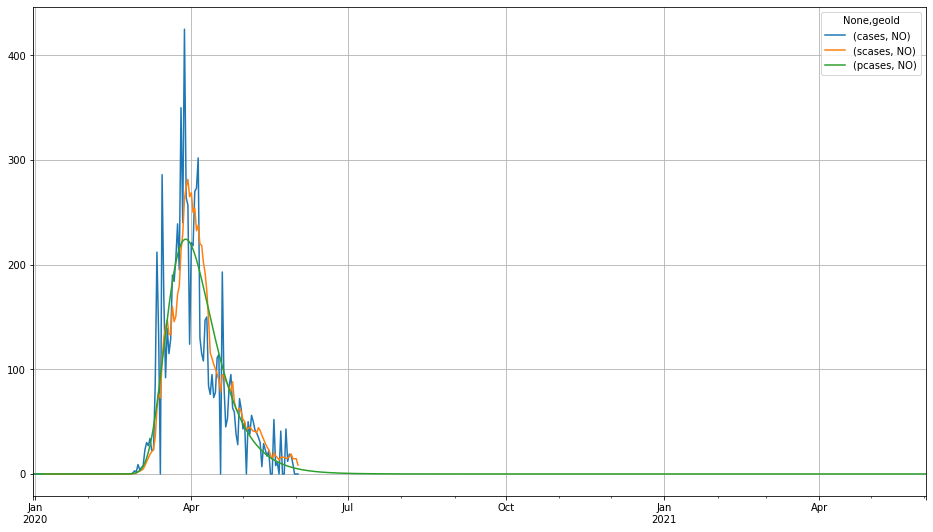

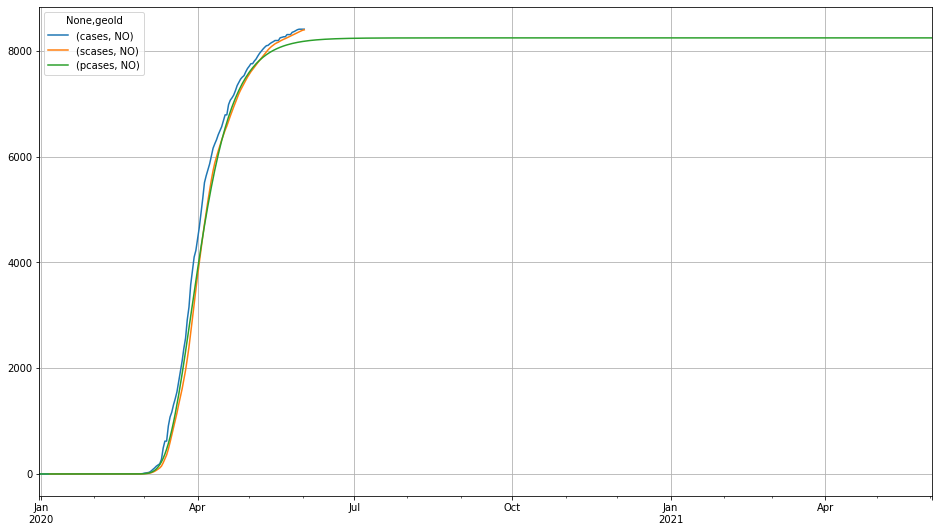

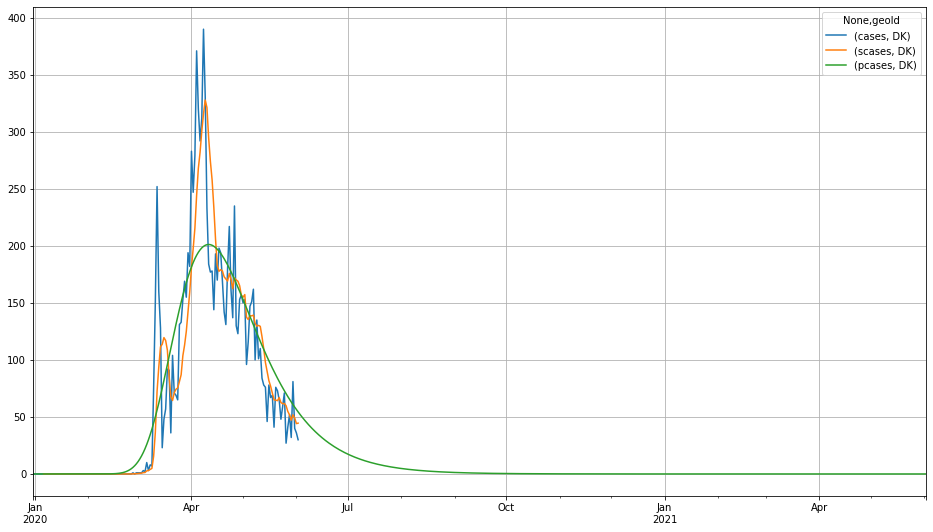

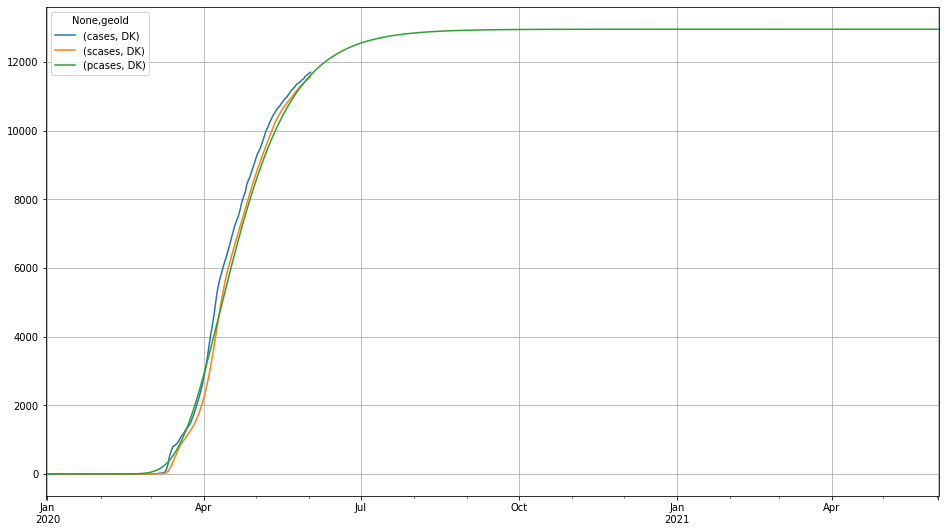

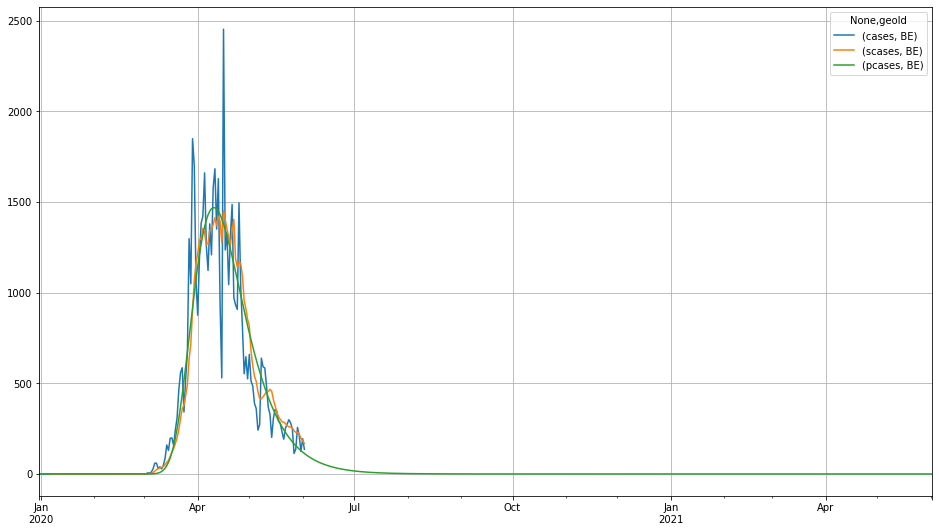

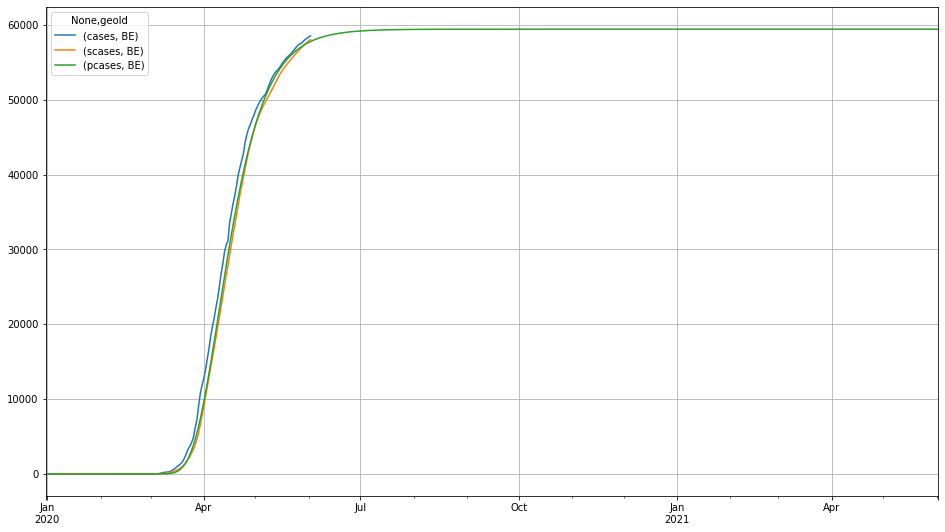

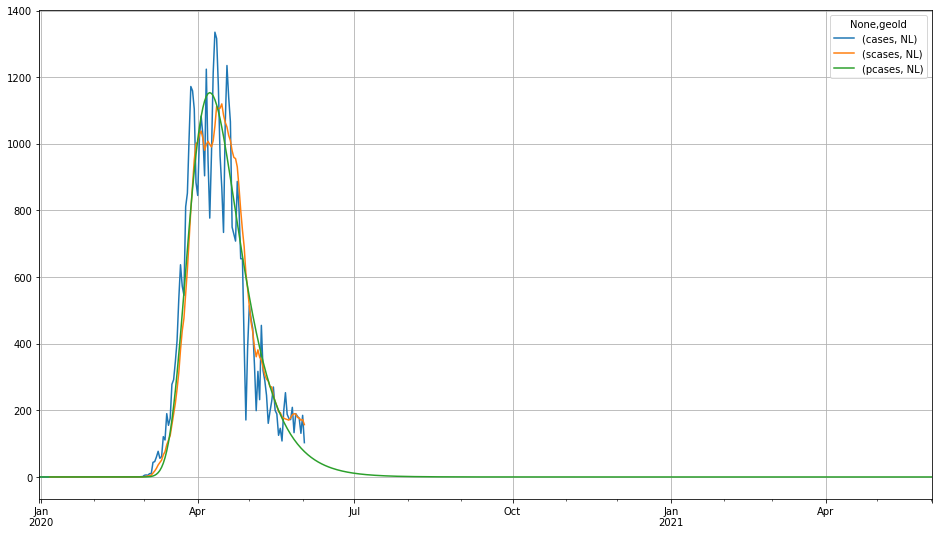

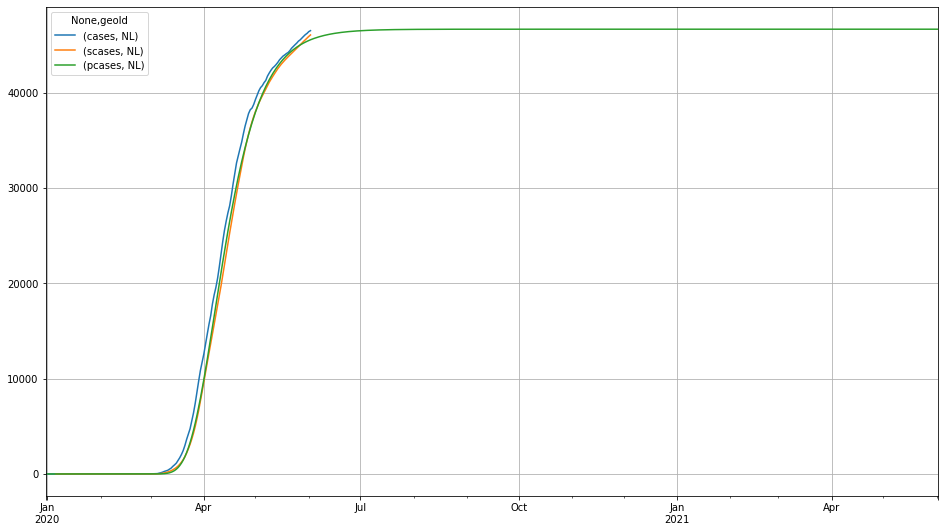

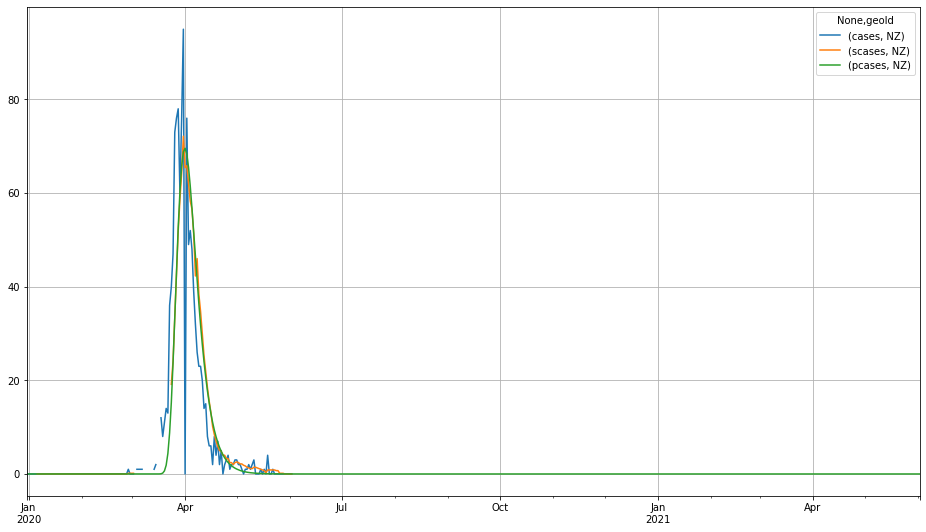

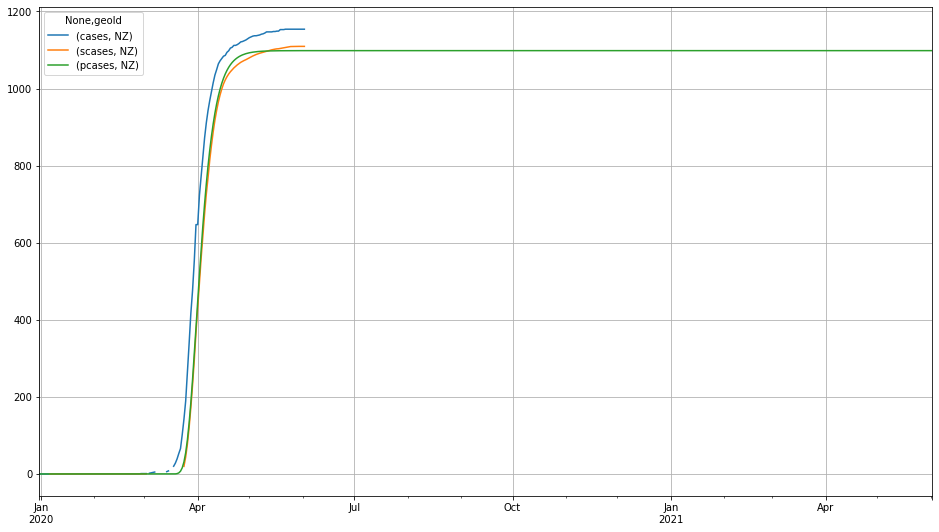

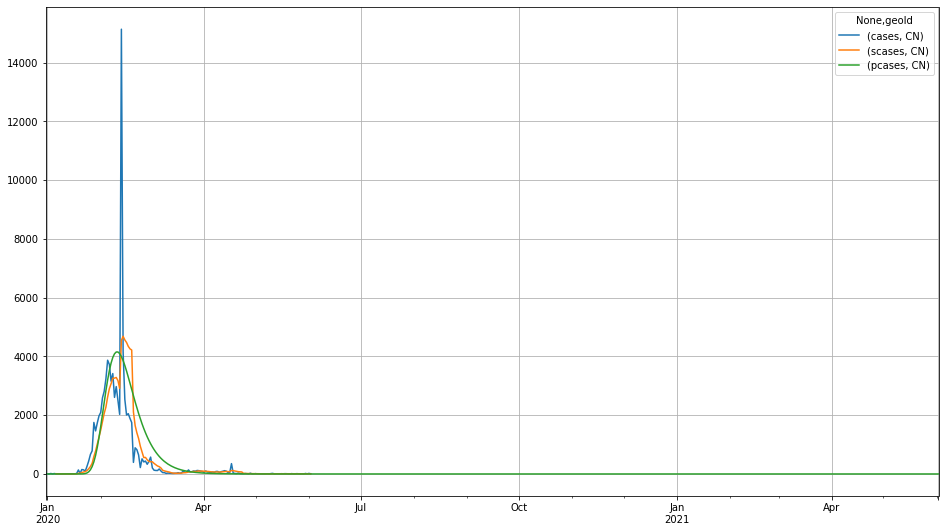

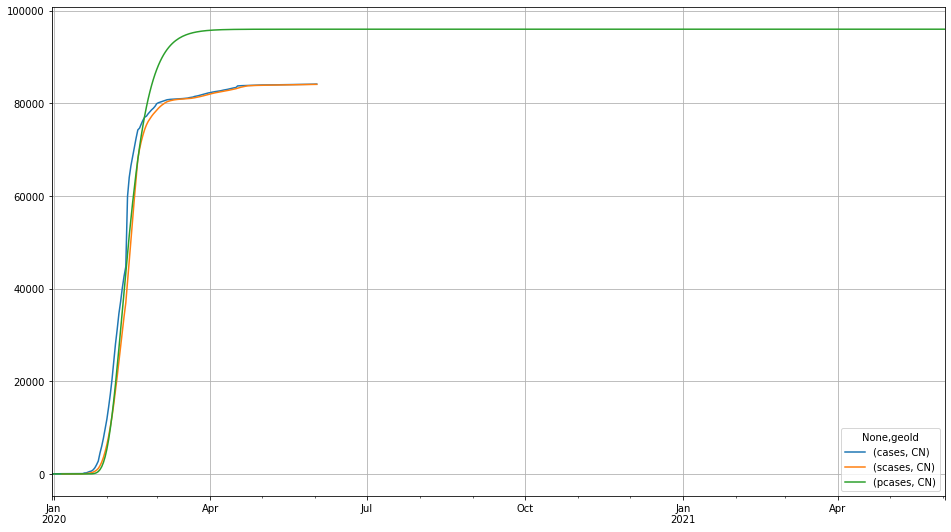

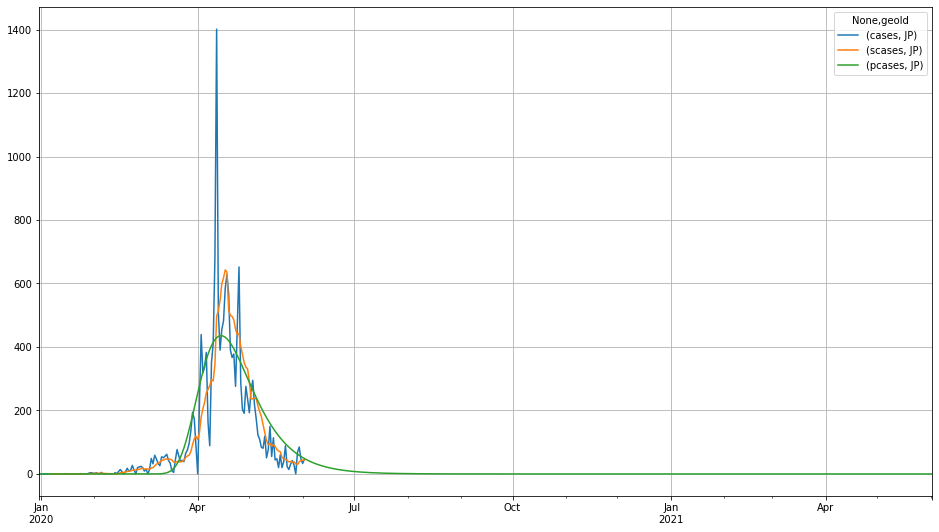

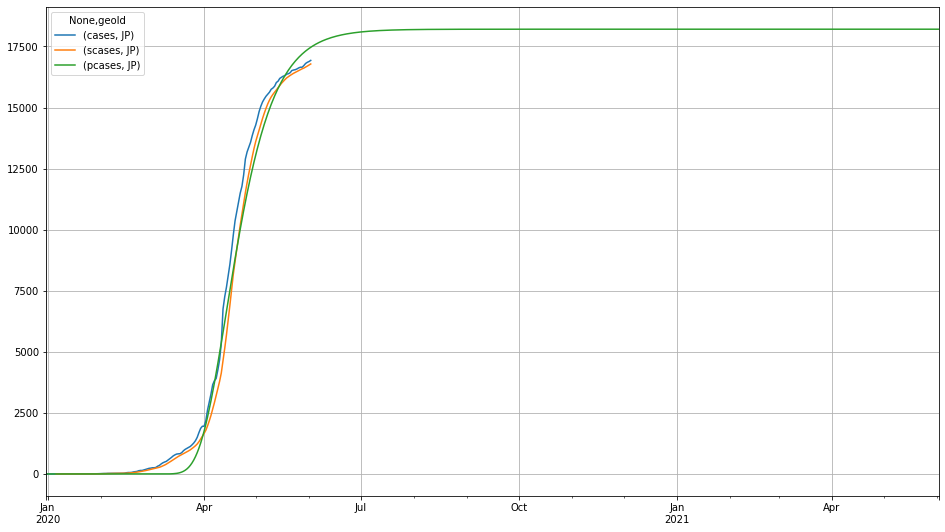

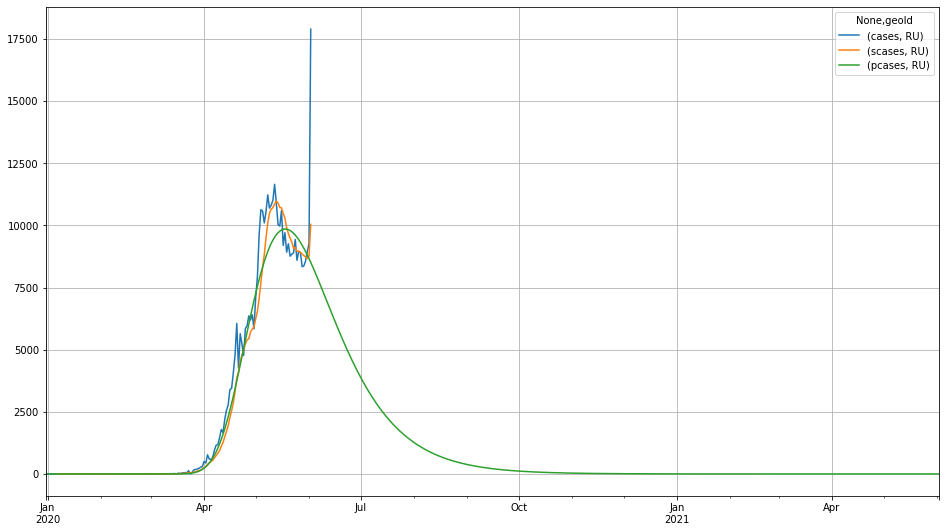

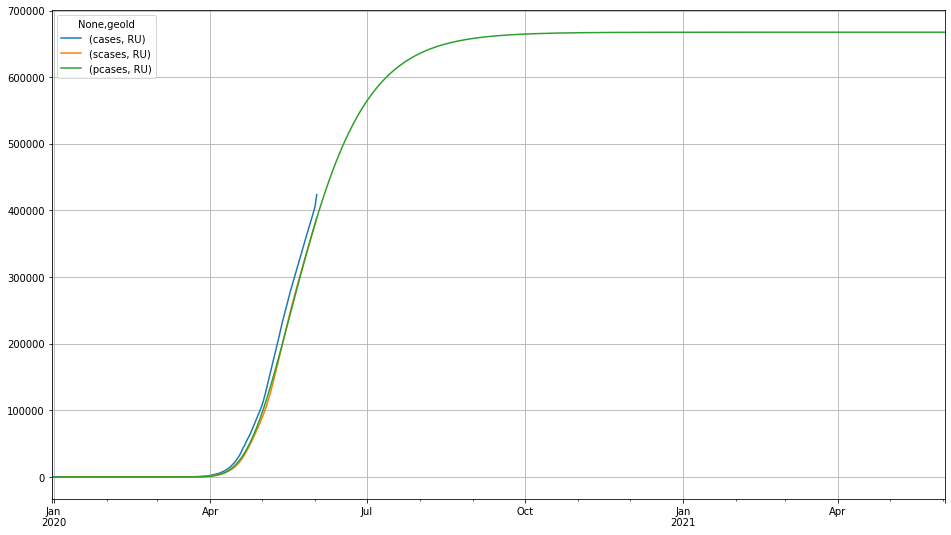

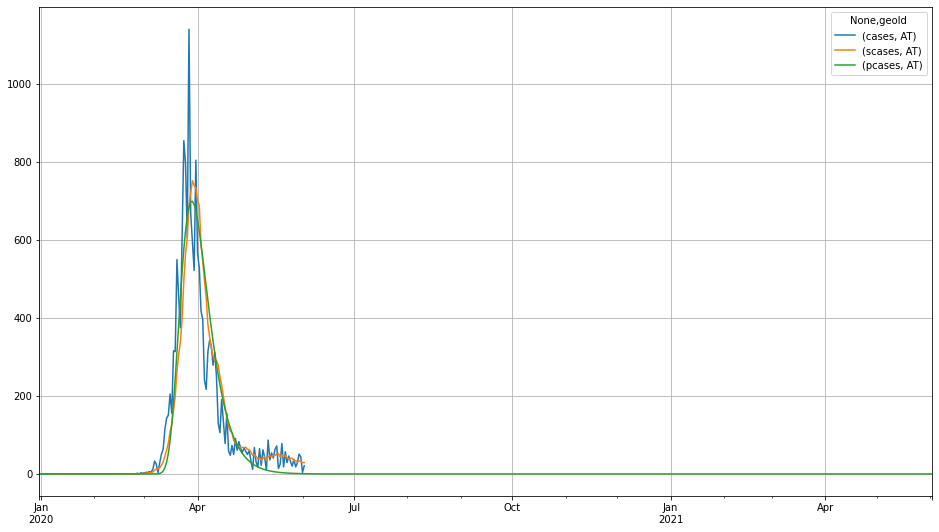

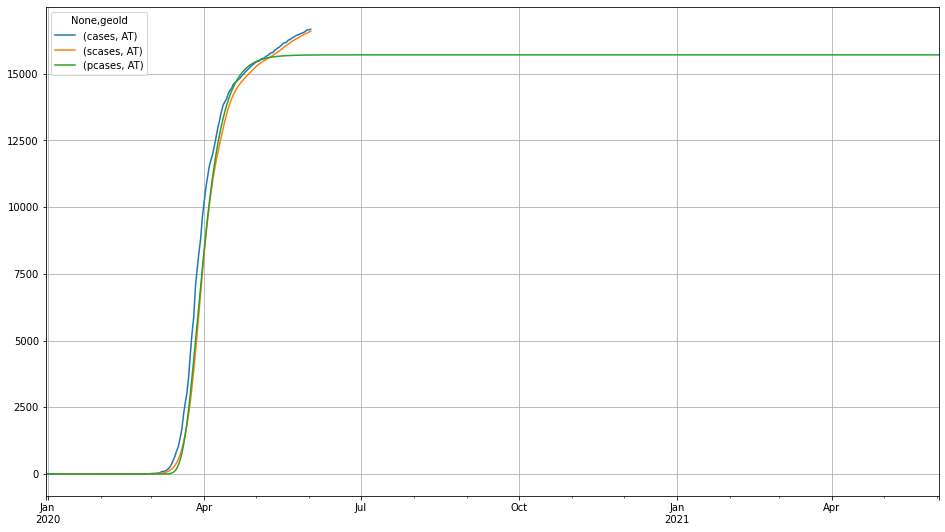

In [15]:
# Select countries to fit.
#countries = np.sort(df['geoId'].unique())
countries = ['US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT']

# Choose whether to output plots per country.
showplots = True

# Create an output dataframe.
df_out = pd.DataFrame({
    'cname':np.nan,
    'iso3':np.nan,
    'ccont':np.nan,
    'popdata':np.nan,
    'rsquared':np.nan,
    'progress':np.nan,
    'final':np.nan,
    'start':np.nan,
    'peak':np.nan,
    'floor':np.nan,
    'beta':np.nan,
    'mu':np.nan,
    'maxcur':np.nan},
    index=countries)

# Choose measure to fit and variables to store predicted and smoothed measures.
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

from scipy.stats import linregress

# Run the fitting approach for all countries.
for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    # Extract country parameters from the original dataset.
    cname   = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    iso3    = df[df['geoId'] == country]['countryterritoryCode'].iloc[0]
    ccont   = df[df['geoId'] == country]['continentExp'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]

    # We will only use measures above one in a million.
    mincases = popdata / 1e6
    
    # Clean up source data and prepare for fitting
    df_pred['cumul'] = df_pred[measure].cumsum()
    df_pred['gumdiv'] = df_pred[measure] / df_pred['cumul']
    df_pred = df_pred[(df_pred['gumdiv'] > 0)]
    df_pred['linear'] = np.log(df_pred['gumdiv'])
    df_pred = df_pred[(df_pred['linear'] < -2) &
                      (df_pred['linear'] > -5) &
                      (df_pred[measure] > mincases)]
    
    # Start fitting only if more than 9 measures left
    if len(df_pred) > 9:
        slope, intercept, rvalue, pvalue, stderr = linregress(df_pred[['daynum', 'linear']])
        rsquared = rvalue ** 2
        df_pred['fitted'] = df_pred['daynum'] * slope + intercept

        # Calculate Gumbel beta and mu from our linear fit parameters
        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        # Find the final number of cases by scaling back to the original data
        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']
        final = df_pred['scale'].mean()

        # Create predicted measures by calculating the scaled Gumbel PDF
        df_geo[(pmeasure, country)] = gumpdf(df_geo['daynum'], beta, mu) * final

        # Progress is current measure ratio to final
        progress = df_geo[measure][country].sum() / final
        
        # Determine peak, floor, start and final analytically.
        peak = df_geo[(df_geo[(pmeasure, country)] >
                       df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) &
                       (df_geo[(pmeasure, country)].index > peak)].index.min()
        start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) &
                       (df_geo[(pmeasure, country)].index < peak)].index.min()
        final = df_geo[pmeasure][country].sum()
        
        # Maximum current infected seems a good measure for outbreak intensity, to be scaled by population.
        maxcur = df_geo[pmeasure][country].rolling(14).sum().max()
        
        # Create an output record and log results.
        df_out.loc[country] = [cname,
                               iso3,
                               ccont,
                               popdata,
                               rsquared,
                               progress,
                               final,
                               start.date(),
                               peak.date(),
                               floor.date(),
                               beta,
                               mu,
                               maxcur]
        print('{}: R2 {:5.3f} at {:6.2f}% of {:8.0f} start {} peak {} floor {} beta {:5.2f} mu {:3.0f}'.format(
            country,
            rsquared,
            progress * 100,
            final,
            start.date(),
            peak.date(),
            floor.date(),
            beta,
            mu))
        
        # Show cumulative and derived results.
        if showplots:
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
                figsize=(16, 9), grid=True)
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
                figsize=(16, 9), grid=True)
    else:
        df_out.loc[country] = [cname, iso3, ccont, popdata, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

Check the output frame assigning the index name.

In [13]:
df_out.index.name = 'iso2'
df_out

,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur
iso2,,,,,,,,,,,,,
AD,Andorra,AND,Europe,77006.0,0.980429,1.002832e+00,7.628399e+02,2020-03-12,2020-04-02,2020-06-08,9.641994,92.814437,3.749535e+02
AE,United_Arab_Emirates,ARE,Asia,9630959.0,0.925226,4.551891e-01,7.730957e+04,2020-03-14,2020-05-26,2020-12-12,37.038112,147.418175,1.068736e+04
AF,Afghanistan,AFG,Asia,37172386.0,0.539089,1.683567e-03,6.797824e+06,2020-04-13,2021-01-15,NaT,121.076235,381.285454,3.977259e+05
AG,Antigua_and_Barbuda,ATG,America,96286.0,0.640030,7.801262e-01,3.204610e+01,2020-03-21,2020-04-05,2020-05-10,9.759322,96.059650,1.558288e+01
AI,Anguilla,NaN,America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
XK,Kosovo,XKX,Europe,1845300.0,0.829394,7.573384e-01,1.404920e+03,2020-03-17,2020-04-19,2020-06-30,20.015714,109.597962,3.542285e+02
YE,Yemen,YEM,Asia,28498687.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZA,South_Africa,ZAF,Africa,57779622.0,0.003429,1.758259e-35,7.738484e+11,NaT,NaT,NaT,1524.318879,6837.279559,3.415118e+11


Write out the values per country, discarding countries with progress below 1%.

In [14]:
df_out[df_out['progress'] > 0.01].to_csv("zzprogress.csv")

Keep exploring! Stay home, wash your hands, keep your distance.